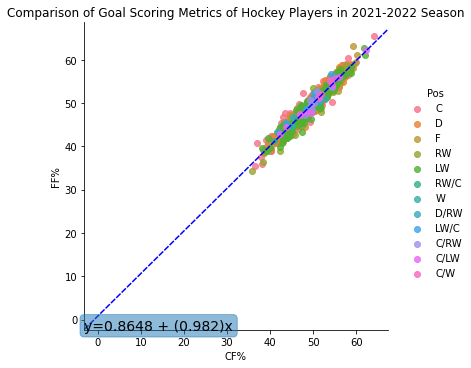

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
import requests


url = 'https://www.hockey-reference.com/leagues/NHL_2022_skaters-advanced.html'

df = pd.read_html(url)

df1 = pd.DataFrame(df[0], columns = None)

z = []
for i in range(len(df1['Unnamed: 2_level_0'])):
    if df1.iloc[i, 2] == 'Age':
        z.append(i)

df2 = df1.drop(df1.index[z])


a = []
for i in df2.columns:
    a.append(i[1:])

b = []
for z in a:
    b.append(''.join(z))

df2.columns = b

data = df2

data['GP'] = data['GP'].astype('int')
data['CF%'] = data['CF%'].astype('float')
data['FF%'] = data['FF%'].astype('float')
data = data[data.GP > 10]

slope, intercept, r_value, p_value, std_err = stats.linregress(data['CF%'],data['FF%'])
slopes = np.around(slope,4)
intercepts = np.around(intercept,4)

g = sns.lmplot(x = 'CF%', y = 'FF%', data = data, fit_reg = False, hue = 'Pos').set(title= 'Comparison of Goal Scoring Metrics of Hockey Players in 2021-2022 Season')
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y='+ str(intercepts)+' + ('+str(slopes)+')x'
a = g.ax.text(0.0, 0.0, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)
g.ax.axline(xy1 = (0,intercepts), slope=slopes, color="b", dashes = (4,1))

plt.show()